In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer

In [2]:
dataset = pd.read_csv('seeds.csv')
X = dataset.iloc[:, :].values

In [3]:
X

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [6]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)
X

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [55]:
print(np.where(dataset.iloc[:,3].values<1))

(array([ 35, 169, 170], dtype=int64),)


In [97]:
out=np.where(X[:,3]<=1)
print(out)
for i in out:
    for j in range (0,2):
        print(i[j])
        X = np.delete(X,i[j],0)

(array([ 35, 169, 170], dtype=int64),)
35
169


array([14.8   , 14.52  ,  0.8823,  5.656 ,  3.288 ,  3.112 ,  5.309 ])

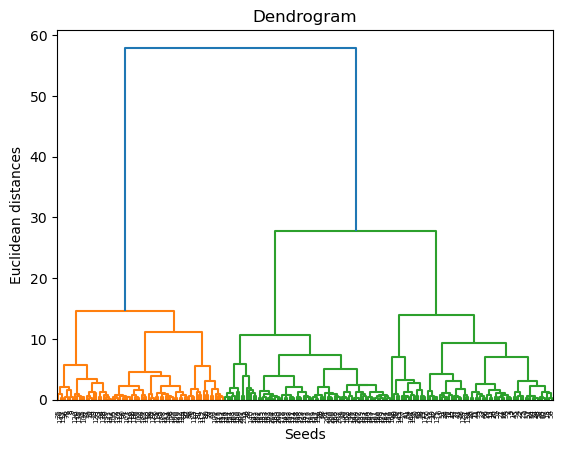

In [101]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Seeds')
plt.ylabel('Euclidean distances')
plt.show()

In [102]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

C:\Users\MyAsus\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


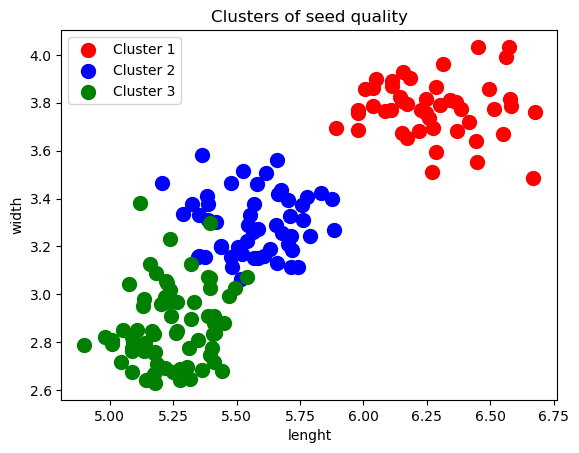

In [103]:
plt.scatter(X[y_hc == 0, 3], X[y_hc == 0, 4],  s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 3], X[y_hc == 1, 4],  s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 3], X[y_hc == 2, 4],  s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter()

#plt.scatter(X[y_hc == 3, 3], X[y_hc == 3, 4], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of seed quality')
plt.xlabel('lenght')
plt.ylabel('width')
plt.legend()
plt.show()